In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
transactions = pd.read_csv(r"C:\Users\muska\Downloads\DATA ANALYTICS\Analytixlabs DVA\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
prod_cat_info = pd.read_csv(r"C:\Users\muska\Downloads\DATA ANALYTICS\Analytixlabs DVA\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
customer = pd.read_csv(r"C:\Users\muska\Downloads\DATA ANALYTICS\Analytixlabs DVA\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv")

In [81]:
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [82]:
prod_cat_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [83]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [84]:
cust_trax_merge = pd.merge(transactions,customer,how='inner', left_on='cust_id', right_on='customer_Id')
Customer_Final = pd.merge(cust_trax_merge, prod_cat_info, how='inner',left_on='prod_subcat_code', right_on='prod_sub_cat_code')

In [85]:
Customer_Final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,1,Clothing,1,Women
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,2,Footwear,1,Mens
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,4,Bags,1,Mens
3,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,1,Clothing,1,Women
4,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,2,Footwear,1,Mens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57161,17963444132,274335,17-05-2011,9,3,4,582,244.440,2572.440,TeleShop,274335,25-05-1974,F,5.0,3,Electronics,9,Cameras
57162,74975935384,274210,3/2/2011,9,3,5,475,249.375,2624.375,e-Shop,274210,06-11-1982,M,3.0,3,Electronics,9,Cameras
57163,28400663785,267797,11/7/2011,9,3,4,1132,475.440,5003.440,e-Shop,267797,10-08-1988,M,8.0,3,Electronics,9,Cameras
57164,27930823669,268388,4/5/2011,9,3,1,1036,108.780,1144.780,e-Shop,268388,17-03-1976,M,8.0,3,Electronics,9,Cameras


### 2. Prepare a summary report for the merged data set.
 a. Get the column names and their corresponding data types
 
 b. Top/Bottom 10 observations
 
 c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
 
 d. Frequency tables for all the categorical variables

In [86]:
#a.Get the column names and their corresponding data types

print(Customer_Final.dtypes)

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


In [87]:
Customer_Final[['tran_date','DOB']] = Customer_Final[['tran_date','DOB']].replace('/','-',regex=True)

In [88]:
Customer_Final[['tran_date','DOB']] = Customer_Final[['tran_date','DOB']].apply(pd.to_datetime,format='%d-%m-%Y')

In [89]:
# Convert 'transaction_id','cust_id','prod_subcat_code', 'prod_cat_code_x','customer_Id','city_code ','prod_cat_code_y','prod_sub_cat_code' to string
Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code_x','customer_Id','city_code','prod_cat_code_y','prod_sub_cat_code']] = Customer_Final[['transaction_id','cust_id','prod_subcat_code','prod_cat_code_x','customer_Id','city_code','prod_cat_code_y','prod_sub_cat_code']].astype(str)

In [90]:
print(Customer_Final.dtypes)

transaction_id               object
cust_id                      object
tran_date            datetime64[ns]
prod_subcat_code             object
prod_cat_code_x              object
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
customer_Id                  object
DOB                  datetime64[ns]
Gender                       object
city_code                    object
prod_cat_code_y              object
prod_cat                     object
prod_sub_cat_code            object
prod_subcat                  object
dtype: object


In [91]:
#b. Top/Bottom 10 observations

print("Top 10 Observations:")
print(Customer_Final.head(10).to_string(index=False))

print("Bottom 10 Observations:")
print(Customer_Final.tail(10).to_string(index=False))

Top 10 Observations:
transaction_id cust_id  tran_date prod_subcat_code prod_cat_code_x  Qty  Rate     Tax  total_amt Store_type customer_Id        DOB Gender city_code prod_cat_code_y prod_cat prod_sub_cat_code prod_subcat
   80712190438  270351 2014-02-28                1               1   -5  -772 405.300  -4265.300     e-Shop      270351 1981-09-26      M       5.0               1 Clothing                 1       Women
   80712190438  270351 2014-02-28                1               1   -5  -772 405.300  -4265.300     e-Shop      270351 1981-09-26      M       5.0               2 Footwear                 1        Mens
   80712190438  270351 2014-02-28                1               1   -5  -772 405.300  -4265.300     e-Shop      270351 1981-09-26      M       5.0               4     Bags                 1        Mens
   80712190438  270351 2014-02-20                1               1    5   772 405.300   4265.300     e-Shop      270351 1981-09-26      M       5.0               1 Clo

In [92]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

continuous_columns = Customer_Final.select_dtypes(include=np.number).columns

for column in continuous_columns:
    min_value = np.min(Customer_Final[column])
    Q1 = np.percentile(Customer_Final[column], 25)
    median = np.median(Customer_Final[column])
    Q3 = np.percentile(Customer_Final[column], 75)
    max_value = np.max(Customer_Final[column])
    
    print(f"Column: {column}")
    print(f"Minimum: {min_value}")
    print(f"Q1: {Q1}")
    print(f"Median: {median}")
    print(f"Q3: {Q3}")
    print(f"Maximum: {max_value}")
    print("\n")

Column: Qty
Minimum: -5
Q1: 1.0
Median: 3.0
Q3: 4.0
Maximum: 5


Column: Rate
Minimum: -1499
Q1: 312.0
Median: 709.0
Q3: 1109.0
Maximum: 1500


Column: Tax
Minimum: 7.35
Q1: 98.49
Median: 199.3425
Q3: 364.98
Maximum: 787.5


Column: total_amt
Minimum: -8270.925
Q1: 764.66
Median: 1759.16
Q3: 3553.68
Maximum: 8287.5




In [93]:
#d. Frequency tables for all the categorical variables

Customer_Final[['prod_subcat_code','prod_cat_code_x','Store_type','prod_cat_code_y','prod_cat','prod_sub_cat_code','prod_subcat']].value_counts()

prod_subcat_code  prod_cat_code_x  Store_type      prod_cat_code_y  prod_cat          prod_sub_cat_code  prod_subcat
12                6                e-Shop          5                Books             12                 Academic       462
                                                   6                Home and kitchen  12                 Tools          462
4                 3                e-Shop          3                Electronics       4                  Mobiles        440
                                                   2                Footwear          4                  Kids           440
                                                   1                Clothing          4                  Mens           440
                                                                                                                       ... 
10                5                TeleShop        6                Home and kitchen  10                 Kitchen        166
               

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

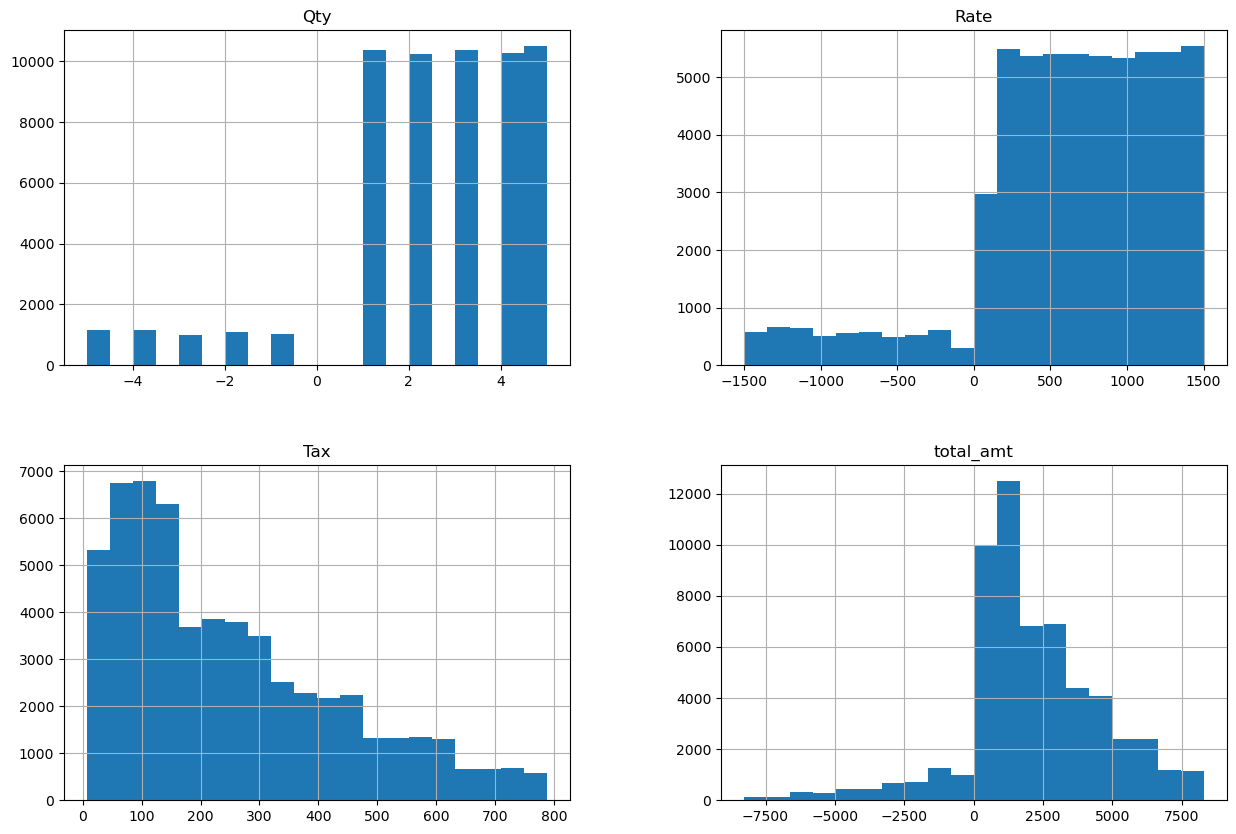

KeyboardInterrupt: 

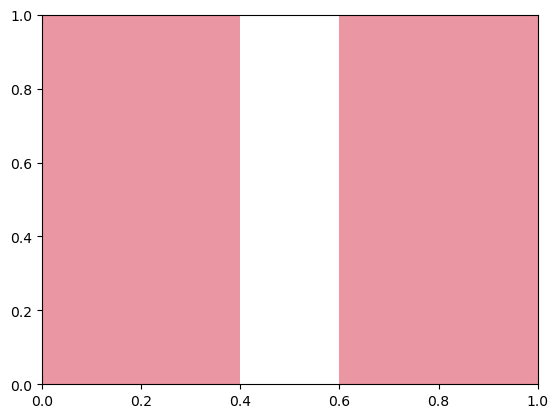

In [94]:
# Continuous Variables (Histograms)
continuous_columns = Customer_Final.select_dtypes(include=['int64', 'float64']).columns
Customer_Final[continuous_columns].hist(bins=20, figsize=(15, 10))
plt.show()

# Categorical Variables (Countplots)
categorical_columns = Customer_Final.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.countplot(x=column, data=Customer_Final)
    plt.show()

### 4. Calculate the following information using the merged dataset :
 a. Time period of the available transaction data
 
 b. Count of transactions where the total amount of transaction was negative

In [95]:
# a. Time period of the available transaction data
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Minimum Date: 2011-01-25 00:00:00
Maximum Date: 2014-02-28 00:00:00


In [96]:
#b. Count of transactions where the total amount of transaction was negative
(Customer_Final['total_amt']<0).sum()

5430

### 5. Analyze which product categories are more popular among females vs male customers.

In [97]:
Customer_Final.groupby(['prod_cat', 'Gender'])['Qty'].sum().unstack().idxmax()

Gender
F    Books
M    Books
dtype: object

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [98]:
import pandas as pd

# Group by 'city_code' and count the number of customers
city_customers_count = Customer_Final['cust_id'].groupby(Customer_Final['city_code']).count()

# Find the city code with the maximum customers
max_customers_city = city_customers_count.idxmax()

# Calculate the percentage of customers from the total.
(city_customers_count[max_customers_city] / len(Customer_Final)) * 100

10.427526851625093

### 7. Which store type sells the maximum products by value and by quantity?

In [108]:
#Total quantity and total amount by each store.
CustomerFinal_grouped = Customer_Final.groupby('Store_type').agg(total_quantity=('Qty','sum'),total_amt=('total_amt','sum'))

#Store type with maximum quantity and amount.
max_qty_store=CustomerFinal_grouped['total_quantity'].idxmax()
max_amt_store=CustomerFinal_grouped['total_amt'].idxmax()

print(f"{max_qty_store} is selling maxumum products by quantity with {CustomerFinal_grouped['total_quantity'].max()} and {max_amt_store} is selling maximum products by value with {CustomerFinal_grouped['total_amt'].max()}")

e-Shop is selling maxumum products by quantity with 56372 and e-Shop is selling maximum products by value with 49096588.71


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

In [118]:
Customer_Final_filtered = Customer_Final[
    (Customer_Final['Store_type'] == 'Flagship store') & 
    (Customer_Final['prod_cat'].isin(['Electronics', 'Clothing']))]

Customer_Final_filtered['total_amt'].sum()

8526843.0

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [121]:
CustomerFinal_filtered = Customer_Final[(Customer_Final['Gender']=='M') &
              (Customer_Final['prod_cat']=='Electronics')]

CustomerFinal_filtered['total_amt'].sum()

10947130.024999999

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [123]:
#Filterong the data, removing all the negative values for total amount
Customer_Final = Customer_Final[Customer_Final['total_amt']>0]

#Calculate unique transaction of each customer
unique_trax = Customer_Final.groupby('cust_id')['transaction_id'].nunique()

#Count customers with more than 10 unique transactions
unique_trax[unique_trax>10].count()

6

### 11. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?
 
 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [127]:
#Created a new column of age based on DOB.
Customer_Final['age'] = (pd.to_datetime('today')-Customer_Final['DOB']).dt.days//365

#Filtering for customers aged 25-35
filtered_CF = Customer_Final[(Customer_Final['age']>=25) & (Customer_Final['age']<=35)]

#a. What was the total amount spent for “Electronics” and “Books” product categories?
electronics_books_df = filtered_CF[filtered_CF['prod_cat'].isin(['Electronics', 'Books'])]
electronics_books_df['total_amt'].sum()

11186888.504999999

In [133]:
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
date_filtered_df = filtered_CF[(filtered_CF['tran_date'] >= '2014-1-1') & (filtered_CF['tran_date'] <= '2014-3-1')]
date_filtered_df['total_amt'].sum()

1536451.67